<a href="https://colab.research.google.com/github/adithyamadhavan/Black_Friday/blob/main/Black_Friday.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Preprocessing


##Importing Libraries for Data Preprocessing and Model Building


In [1]:
# Data Preprocessing
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas.util.testing as tm
%matplotlib inline
%matplotlib notebook
#Feature Engineering
from statsmodels.distributions.empirical_distribution import ECDF
from IPython.display import display
from sklearn.preprocessing import LabelEncoder as le

#Data Modelling
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import DecisionTreeRegressor

#Cross Validation and 







/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  


In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [3]:
data = pd.read_csv('/content/drive/My Drive/Colab datasets/blackfridaytrain.csv')

In [5]:
test_data = pd.read_csv('/content/drive/My Drive/Colab datasets/blackfridaytest.csv')

In [6]:
test_data

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0
...,...,...,...,...,...,...,...,...,...,...,...
233594,1006036,P00118942,F,26-35,15,B,4+,1,8,NaN,NaN
233595,1006036,P00254642,F,26-35,15,B,4+,1,5,8.0,NaN
233596,1006036,P00031842,F,26-35,15,B,4+,1,1,5.0,12.0
233597,1006037,P00124742,F,46-50,1,C,4+,0,10,16.0,NaN


##EDA


In [7]:
data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [9]:
data.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

In [10]:
data.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

In [11]:
data.groupby(['Age','Gender','Marital_Status'])['Purchase'].count()

Age    Gender  Marital_Status
0-17   F       0                   5083
       M       0                  10019
18-25  F       0                  18357
               1                   6271
       M       0                  60187
               1                  14845
26-35  F       0                  30078
               1                  20674
       M       0                 103218
               1                  65617
36-45  F       0                  16649
               1                  10521
       M       0                  49728
               1                  33115
46-50  F       0                   3166
               1                  10033
       M       0                   9524
               1                  22978
51-55  F       0                   3580
               1                   6314
       M       0                   7259
               1                  21348
55+    F       0                   1908
               1                   3175
       M  

In [12]:
data.groupby(['Product_Category_1','Product_Category_2','Product_Category_3'])['Purchase'].count()

Product_Category_1  Product_Category_2  Product_Category_3
1                   2.0                 3.0                    613
                                        4.0                    524
                                        5.0                   7982
                                        6.0                   1924
                                        8.0                   2800
                                                              ... 
11                  15.0                16.0                   850
12                  14.0                17.0                   159
13                  14.0                16.0                   519
                    15.0                16.0                   537
15                  16.0                17.0                   151
Name: Purchase, Length: 137, dtype: int64

In [13]:
data.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

In [14]:
data["Marital_Status"].unique()

array([0, 1])

In [15]:
data["Occupation"].unique()

array([10, 16, 15,  7, 20,  9,  1, 12, 17,  0,  3,  4, 11,  8, 19,  2, 18,
        5, 14, 13,  6])

In [16]:
data['City_Category'].unique()

array(['A', 'C', 'B'], dtype=object)

In [17]:
data

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969
...,...,...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,51-55,13,B,1,1,20,NaN,NaN,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,NaN,NaN,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,NaN,NaN,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,NaN,NaN,365


In [18]:
data.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

###EDA - Data Distribution


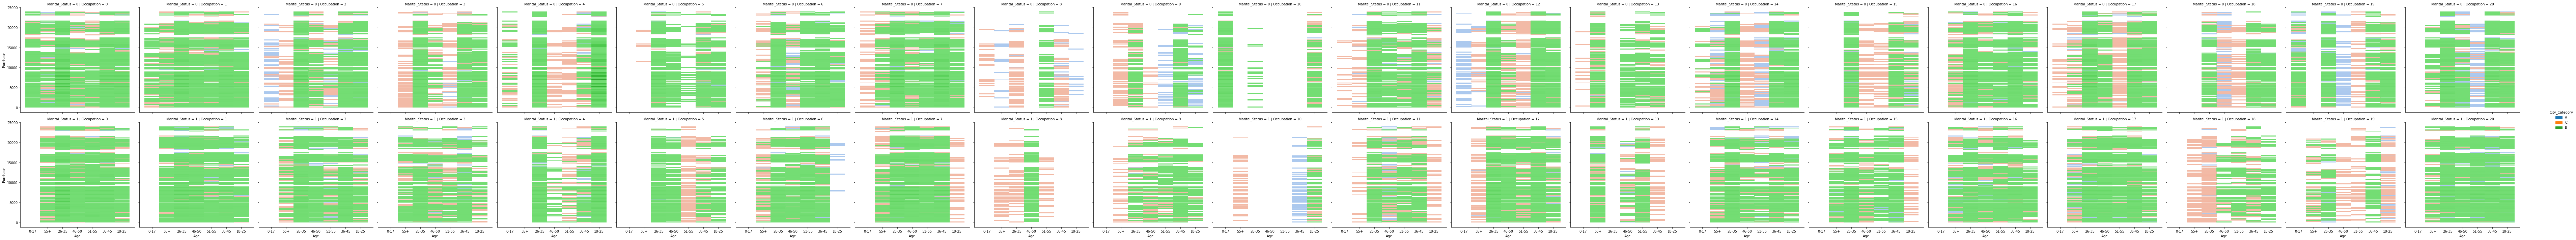

In [19]:
%matplotlib inline
sns.displot(x=data['Age'],y=data['Purchase'],hue=data['City_Category'],row=data['Marital_Status'],col=data['Occupation'],legend=True)

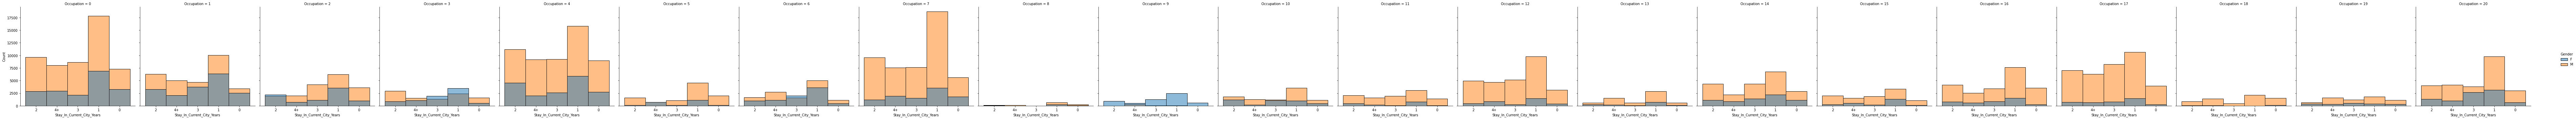

In [20]:
sns.displot(x=data['Stay_In_Current_City_Years'],hue =data['Gender'],col=data['Occupation'],data=data)

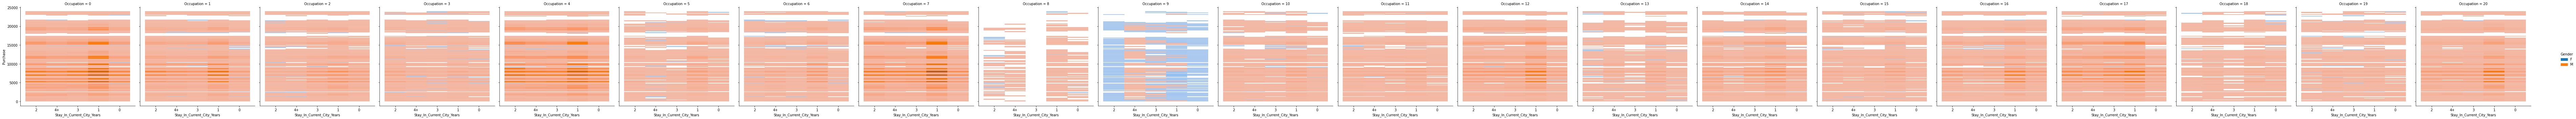

In [21]:
sns.displot(x=data['Stay_In_Current_City_Years'],y=data['Purchase'],hue =data['Gender'],col=data['Occupation'],data=data,legend=True)

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


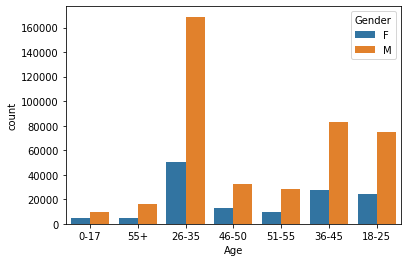

In [23]:
sns.countplot(x=data['Age'],data=data,hue=data['Gender'])

In [24]:
print("Missing% Summary")
(data.isnull().sum()/len(data))*100


Missing% Summary


User_ID                        0.000000
Product_ID                     0.000000
Gender                         0.000000
Age                            0.000000
Occupation                     0.000000
City_Category                  0.000000
Stay_In_Current_City_Years     0.000000
Marital_Status                 0.000000
Product_Category_1             0.000000
Product_Category_2            31.566643
Product_Category_3            69.672659
Purchase                       0.000000
dtype: float64

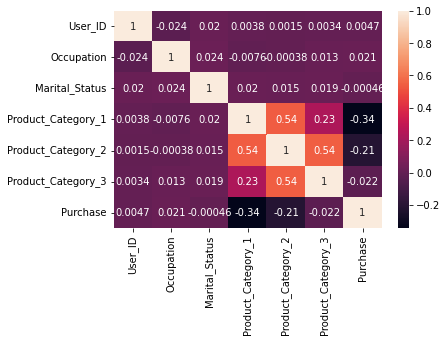

In [25]:
corr =data.corr()
sns.heatmap(corr,fmt=".2g",annot=True)


In [26]:
data.shape

(550068, 12)

In [27]:
data.iloc[:,7:-1]

,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,0,3,NaN,NaN
1,0,1,6.0,14.0
2,0,12,NaN,NaN
3,0,12,14.0,NaN
4,0,8,NaN,NaN
...,...,...,...,...
550063,1,20,NaN,NaN
550064,0,20,NaN,NaN
550065,1,20,NaN,NaN
550066,0,20,NaN,NaN


In [ ]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(missing_values=np.nan,n_neighbors=3)
Product_category_2_3 = imputer.fit_transform(data[['Product_Category_2',"Product_Category_3"]])

In [ ]:
data.dropna(inplace=True)

In [ ]:
data.shape

In [ ]:
corr_cleaned = data.corr()
sns.heatmap(corr_cleaned,fmt='.2g',annot=True)

In [ ]:
data.describe()

In [ ]:
data.isnull().sum()

In [ ]:
b =data.groupby(['Product_Category_1','Product_Category_2','Product_Category_3',"Age","Occupation"])['Purchase'].count().reset_index()
b

In [ ]:
b.nlargest(60,keep='last',columns='Purchase')

In [ ]:
%matplotlib inline
sns.displot(x=b['Age'],y=b['Purchase'],hue =b['Occupation'],data=b)


In [ ]:
%matplotlib inline
display("Product Category 1")
display(sns.ecdfplot(x=data['Product_Category_1'],data=data,legend=True))
display("Product Category 2")
display(sns.ecdfplot(x=data['Product_Category_2'],data=data,legend=True))
display("Product Category 3")
display(sns.ecdfplot(x=data['Product_Category_3'],data=data))
plt.show()

In [ ]:
edf = ECDF(data['Purchase'])
edf

In [ ]:
plt.plot(edf.x,edf.y)
plt.title("Purchase Cumulative Density Function")
plt.xlabel('Purchase')
plt.ylabel("%Percent")
plt.show()

In [ ]:
data.duplicated().sum()

# Feature Engineering

In [ ]:
data.info()

In [ ]:
for i in range(0,len(data.columns)):
  if data[data.columns[i]].dtype == 'object':
    print("Non Numeric Features")
    print(data.columns[i])
  

In [ ]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
data['Age'] =le.fit_transform(data['Age'])
data['Product_ID'] =le.fit_transform(data['Product_ID'])
data['City_Category'] =le.fit_transform(data['City_Category'])
data['Stay_In_Current_City_Years'] =le.fit_transform(data['Stay_In_Current_City_Years'])
data['Gender'] =le.fit_transform(data['Gender'])

le.classes_ #Last Features Transformed Classes


In [ ]:
data

In [ ]:
data.info()

In [ ]:
for i in range(0,len(data.columns)):
  if data[data.columns[i]].dtype == 'object':
    print("Non Numeric Features")
    print(data.columns[i])
  else:
    print("All Features are Numeric")
    print("Count of Columns",len(data.columns))

In [ ]:
%matplotlib inline
sns.pairplot(data)


# Model Building


In [ ]:
X = data.iloc[:,:-1]
Y = data.iloc[:,-1]

In [ ]:
X

In [ ]:
Y

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,Y,train_size=0.75,random_state=123)
display(X_train)
display(y_train)
display(X_test)
display(y_test)

In [ ]:
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression

In [ ]:
pipe_line = Pipeline(steps =[('scaler',StandardScaler()),("SVR",SVR(C=100,gamma=1))])
pipe_line.fit(X_train,y_train)


In [ ]:
pipe_line.score(X_test,y_test)

In [ ]:
pipe_line_lr = Pipeline(steps =[('scaler',StandardScaler()),("Linear Regression",LinearRegression())])
pipe_line_lr.fit(X_train,y_train)


In [ ]:
pipe_line_ad = Pipeline(steps =[('scaler',StandardScaler()),("AdaBoost Regression",AdaBoostRegressor())])
pipe_line_ad.fit(X_train,y_train)


In [ ]:
pipe_line_ad.score(X_test,y_test)

In [ ]:
pipe_line_extra_reg = Pipeline(steps =[('scaler',StandardScaler()),("ExtraTrees Regression",ExtraTreesRegressor())])
pipe_line_extra_reg.fit(X_train,y_train)


In [ ]:

>>> pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC())])
>>> # The pipeline can be used as any other estimator
>>> # and avoids leaking the test set into the train set
>>> pipe.fit(X_train, y_train)
Pipeline(steps=[('scaler', StandardScaler()), ('svc', SVC())])
>>> pipe.score(X_test, y_test)